## 과제명 : 100 코호트를 이용한 IBD와 BE발생 영향 상관관계

- 의뢰처 : 충북대학교
- 사용데이터 : 국민건겅보험공단 데이터

## Visualization 1. Cumulative Incidence plot

- IBD가 있는 코호트와 없는 코호트 간의 BE가 발생하기까지의 Cumulative incidence 차이
- 즉 염증성 장 질환이 있고 없고 여부에 따라 바렛식도가 발생할 누적 위험도가 다르게 나타나는지를 확인하는 것이 목적

* IBD : 염증성 장질환 (Inflammatory bowel disease)
* BE : 바렛식도 (Barrett's esophagus)

In [23]:
library(tidyverse)
library(readxl)

In [ ]:
setwd("G:/내 드라이브/취업/메디크로/plot")

In [7]:
# female data import
df <- read_excel("cifplot.xlsx", sheet = "female")

In [9]:
head(df)

year,Incidence,Incidence_adj,IBD
<dbl>,<dbl>,<dbl>,<chr>
0.000000,0.000000,0.0,N
1.000000,0.000763,76.3,N
1.084699,0.000839,83.9,N
1.163934,0.001140,114.0,N
1.248634,0.001220,122.0,N
1.330601,0.001830,183.0,N


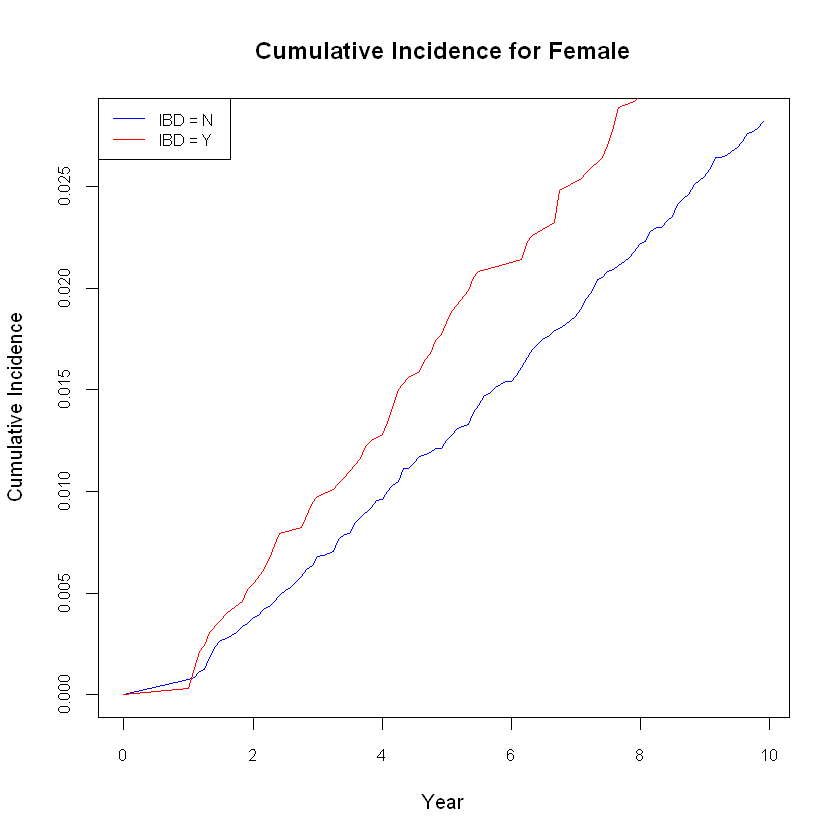

In [10]:
######### female no adjustment#########
# color 버전
plot(df[df$IBD == "N",]$year, df[df$IBD == "N",]$Incidence, type = "l", col = 'blue',
     xlab = "Year", ylab = "Cumulative Incidence", main = "Cumulative Incidence for Female", lwd = 1.5,
     cex.axis=0.8)
lines(df[df$IBD == "Y",]$year, df[df$IBD == "Y",]$Incidence, col = 'red', lwd = 1.5)
legend(x = "topleft", legend = c("IBD = N", "IBD = Y"), col = c("blue", "red"), 
       lty = c(1,1),lwd = c(1.2, 1.2),cex = 0.8)

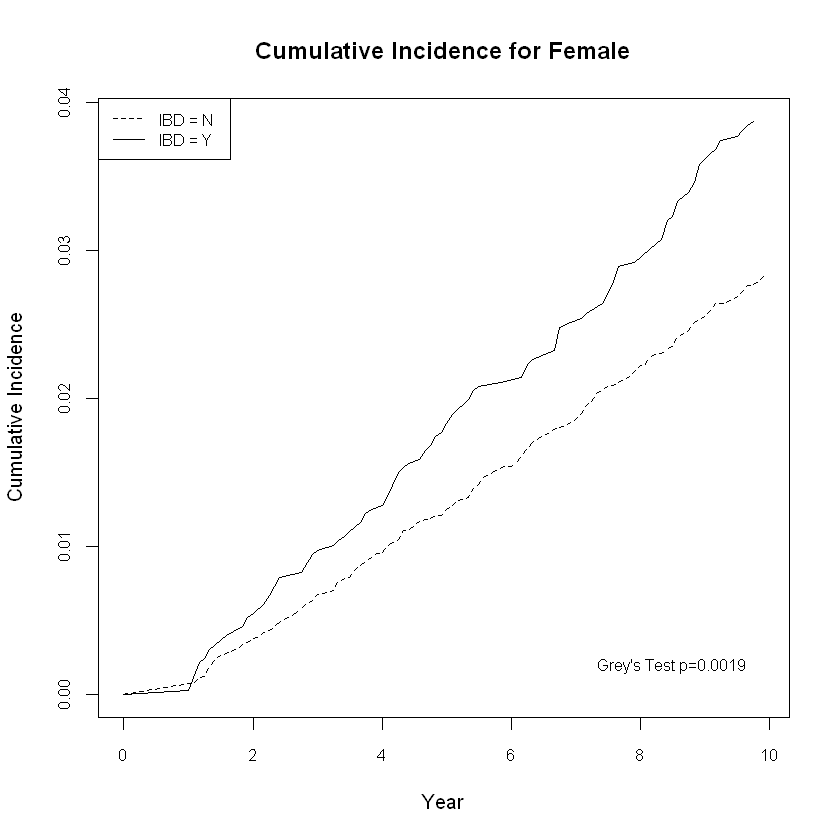

In [11]:
# 점선버전
#png("female_ver1.png",width=609,height=482,res=100)
range <- c(min(df$Incidence) ,max(df$Incidence))
plot(df[df$IBD == "N",]$year, df[df$IBD == "N",]$Incidence, type = "l", lty = 2,
     xlab = "Year", ylab = "Cumulative Incidence", main = "Cumulative Incidence for Female", lwd = 1.5,
     cex.axis=0.8, ylim = range)
lines(df[df$IBD == "Y",]$year, df[df$IBD == "Y",]$Incidence,lwd = 1.5, lty = 1)
legend(x = "topleft", legend = c("IBD = N", "IBD = Y"), 
       lty = c(2,1),lwd = c(1.2, 1.2),cex = 0.8)
text(x = 8.5, y = 0.002,                # First text
     "Grey's Test p=0.0019", cex = 0.8)
#dev.off()

In [12]:
# male data import

In [13]:
df <- read_excel("cifplot.xlsx", sheet = "male")
head(df)

year,Incidence,Incidence_adj,IBD
<dbl>,<dbl>,<dbl>,<chr>
0.000000,0.000000,0.0,N
1.000000,0.000232,23.2,N
1.084699,0.000618,61.8,N
1.163934,0.000927,92.7,N
1.248634,0.001240,124.0,N
1.330601,0.001310,131.0,N


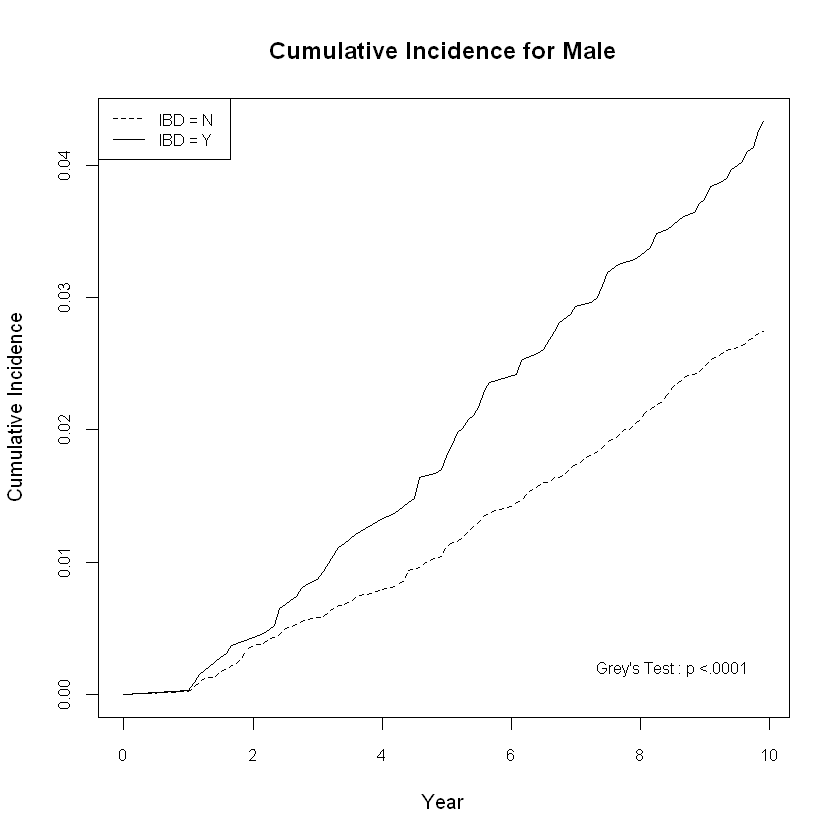

In [14]:
######### male no adjustment ########
# 점선버전1
#png("male_ver1.png",width=609,height=482,res=100)
range <- c(min(df$Incidence) ,max(df$Incidence))
plot(df[df$IBD == "N",]$year, df[df$IBD == "N",]$Incidence, type = "l", lty = 2,
     xlab = "Year", ylab = "Cumulative Incidence", main = "Cumulative Incidence for Male", lwd = 1.5,
     cex.axis=0.8, ylim = range)
lines(df[df$IBD == "Y",]$year, df[df$IBD == "Y",]$Incidence,lwd = 1.5, lty = 1)
legend(x = "topleft", legend = c("IBD = N", "IBD = Y"), 
       lty = c(2,1),lwd = c(1.2, 1.2),cex = 0.8)
text(x = 8.5, y = 0.002,                # First text
     "Grey's Test : p <.0001", cex = 0.8)
#dev.off()

## Visualization 2. Bar plot with significance test result

- IBD가 있는 코호트 중 BE가 있는 코호트와 없는 코호트 사이의 특정 사건 발생(ex. 사망, 응급실 방문)에 대한 Incidence rate의 차이
- rate에 100,000을 곱해 10만명 당 발생 case로 환산하여 bar plot으로 비교
- rate_ratio_test을 통한 두 Incidence rate의 차이 여부에 대한 p-value test 결과를 bar plot에 기재

* Incidence rate : Number of case / (Total population at risk * follow-up year)

In [15]:
library(ggsignif)

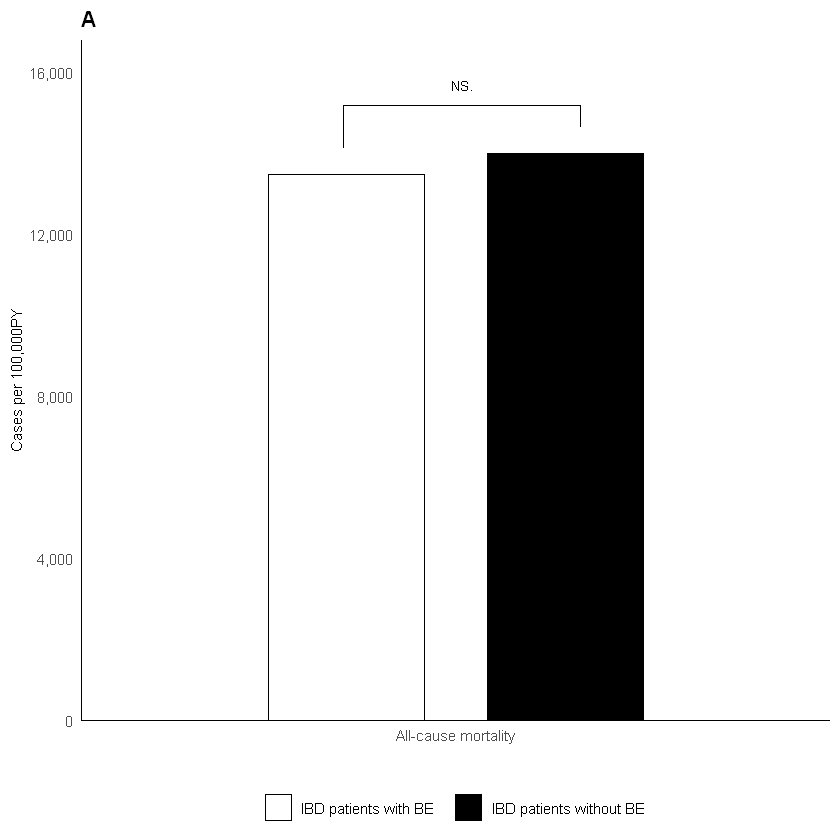

In [16]:
####### DTH_Y ##########

py <- c(14012, 13481)
gr1 <- c("All-cause mortality")
gr2 <- c('IBD patients without BE', 'IBD patients with BE')

df <- data.frame(py, gr1, gr2)

p <- ggplot(df, aes(x = gr1, y = py, color =gr2)) + geom_bar(stat='identity', aes(fill = gr2), width =0.5,
                                                              position=position_dodge(0.7)) + 
  scale_y_continuous(labels = scales::comma,limits = c(0,16000),
                     expand = expansion(mult = c(0, 0.05))) + theme_classic() +
  scale_fill_manual(values=c("white", "black"))+
  scale_color_manual(values=c("black", "black") ) +
  ylab("Cases per 100,000PY") +
  xlab(" ")+
  scale_x_discrete(labels='All-cause mortality')+
  theme(axis.ticks.x = element_blank(), axis.ticks.y = element_blank(),legend.title = element_blank(),
        legend.position = "bottom", axis.title.y = element_text(size = 9),
        plot.title = element_text(face="bold")) +
  labs(title = "A")


p_dth <- p + geom_signif(map_signif_level = FALSE,
                   annotations = c("NS."),
                   y_position = 16000*0.95, xmin = 0.82, xmax = 1.2,
                   tip_length = c(2, 1),
                   textsize = 3,
                   vjust = -0.7)
p_dth


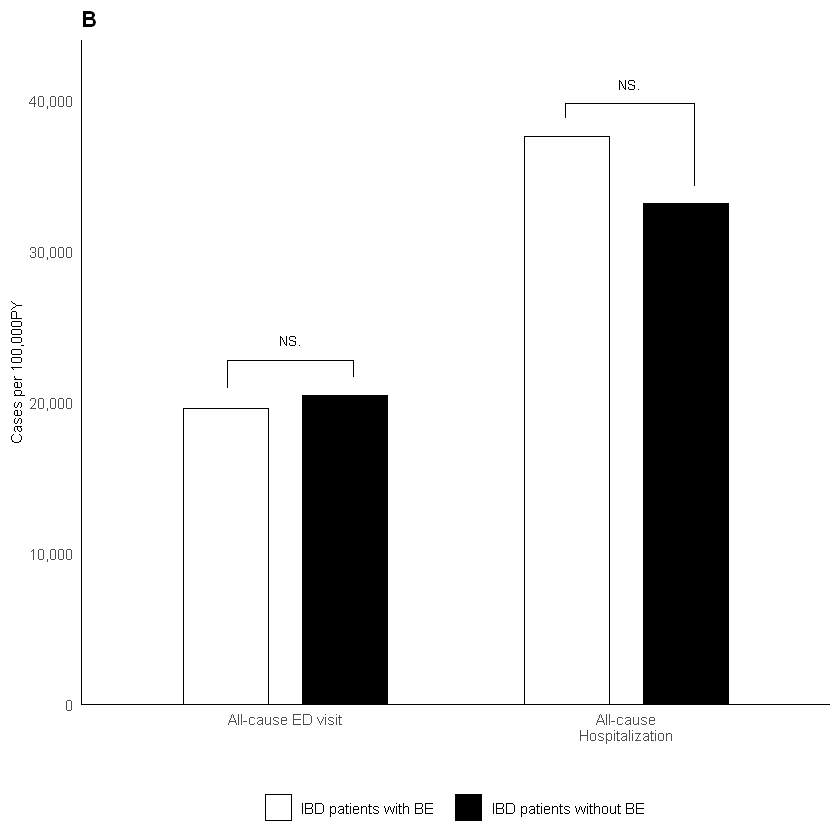

In [17]:
####### ALL_HSP_Y & All_ED_Y ##########

py <- c(20460, 19600,33202, 37640)
gr1 <- c("all_ed", "all_ed", "all_hp", "all_hp")
gr2 <- c('IBD patients without BE', 'IBD patients with BE', 'IBD patients without BE', 'IBD patients with BE')

df <- data.frame(py, gr1, gr2)

p <- ggplot(df, aes(x = gr1, y = py, fill = gr2, color = gr2)) +
  geom_bar(stat = 'identity', width = 0.5, position = position_dodge(0.7)) +
  scale_y_continuous(labels = scales::comma, limits = c(0, 44000), expand = c(0, 0.05)) +
  theme_classic() +
  scale_fill_manual(values = c("white", "black")) +
  scale_color_manual(values = c("black", "black")) +
  ylab("Cases per 100,000PY") +
  xlab(" ") +
  scale_x_discrete(labels = c('All-cause ED visit', 'All-cause\nHospitalization')) +
  theme(axis.ticks.x = element_blank(), axis.ticks.y = element_blank(),legend.title = element_blank(),
        legend.position = "bottom", axis.title.y = element_text(size = 9),
        plot.title = element_text(face="bold")) + 
  labs(title = "B")

p_all <- p + geom_signif(y_position = c(22800, 39800), xmin = c(0.83, 1.82), 
                xmax = c(1.2, 2.2), annotation = c("NS.","NS."),
                tip_length = c( 0.1, 0.06,0.05,0.3),
                textsize =3,
                vjust = -0.7)
p_all


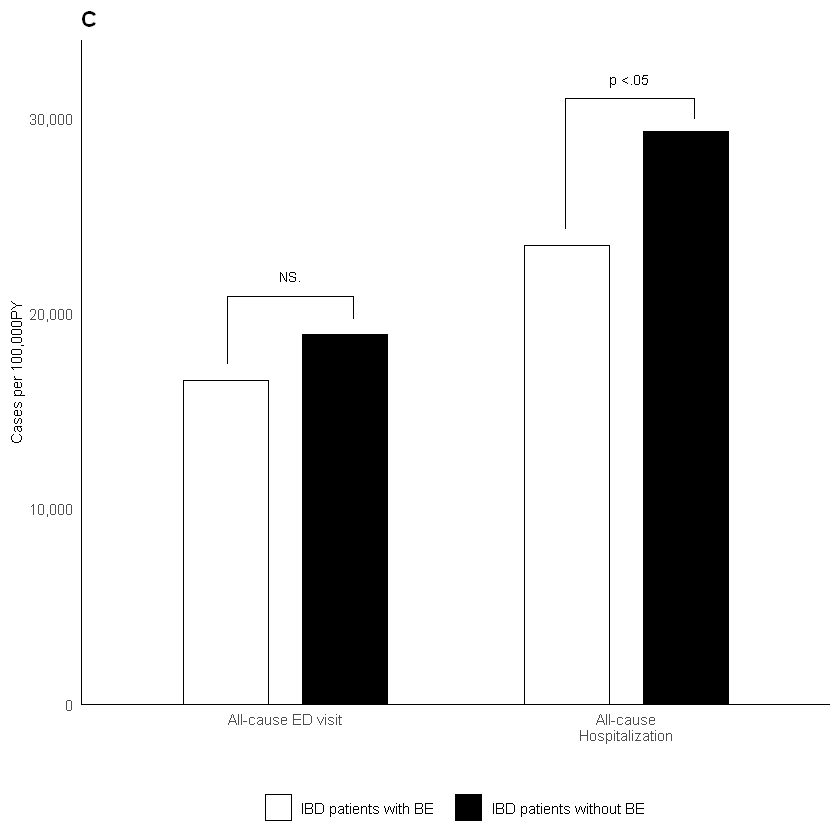

In [18]:
####### RES_HSP_Y & RES_ED_Y ##########

py <- c(18953, 16584,29351, 23505)
gr1 <- c("res_ed", "res_ed", "res_hp", "res_hp")
gr2 <- c('IBD patients without BE', 'IBD patients with BE', 'IBD patients without BE', 'IBD patients with BE')

df <- data.frame(py, gr1, gr2)

p <- ggplot(df, aes(x = gr1, y = py, fill = gr2, color = gr2)) +
  geom_bar(stat = 'identity', width = 0.5, position = position_dodge(0.7)) +
  scale_y_continuous(labels = scales::comma, limits = c(0, 34000), expand = c(0, 0.05)) +
  theme_classic() +
  scale_fill_manual(values = c("white", "black")) +
  scale_color_manual(values = c("black", "black")) +
  ylab("Cases per 100,000PY") +
  xlab(" ") +
  scale_x_discrete(labels = c('All-cause ED visit', 'All-cause\nHospitalization')) +
  theme(axis.ticks.x = element_blank(), axis.ticks.y = element_blank(),legend.title = element_blank(),
        legend.position = "bottom", axis.title.y = element_text(size = 9),
        plot.title = element_text(face="bold")) + 
  labs(title = "C")


p_res <- p + geom_signif(y_position = c(20900, 31000), xmin = c(0.83, 1.82), 
                         xmax = c(1.2, 2.2), annotation = c("NS.","p <.05"),
                         tip_length = c(0.27, 0.09,0.52, 0.08 ),
                         textsize = 3,
                         vjust = -0.7)
p_res

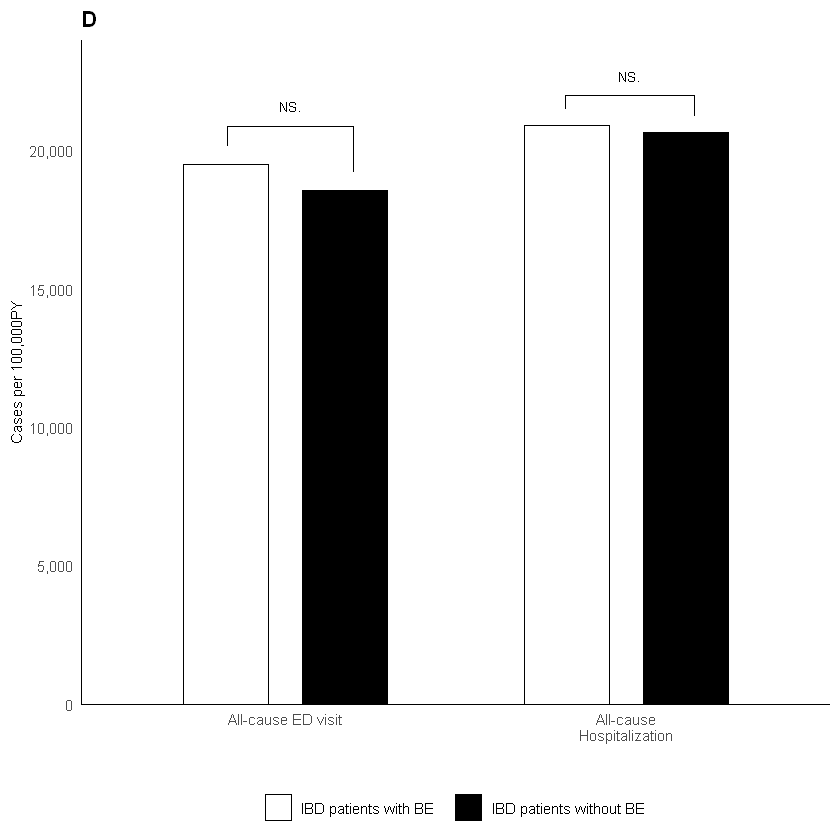

In [19]:
####### IBD_HSP_Y & IBD_ED_Y ##########

py <- c(18570, 19499,20681, 20909)
gr1 <- c("ibd_ed", "ibd_ed", "ibd_hp", "ibd_hp")
gr2 <- c('IBD patients without BE', 'IBD patients with BE', 'IBD patients without BE', 'IBD patients with BE')

df <- data.frame(py, gr1, gr2)

p <- ggplot(df, aes(x = gr1, y = py, fill = gr2, color = gr2)) +
  geom_bar(stat = 'identity', width = 0.5, position = position_dodge(0.7)) +
  scale_y_continuous(labels = scales::comma, limits = c(0, 24000), expand = c(0, 0.05)) +
  theme_classic() +
  scale_fill_manual(values = c("white", "black")) +
  scale_color_manual(values = c("black", "black")) +
  ylab("Cases per 100,000PY") +
  xlab(" ") +
  scale_x_discrete(labels = c('All-cause ED visit', 'All-cause\nHospitalization')) +
  theme(axis.ticks.x = element_blank(), axis.ticks.y = element_blank(),legend.title = element_blank(),
        legend.position = "bottom", axis.title.y = element_text(size = 9),
        plot.title = element_text(face="bold")) + 
  labs(title = "D")


p_ibd <- p + geom_signif(y_position = c(20900, 22000), xmin = c(0.83, 1.82), 
                         xmax = c(1.2, 2.2), annotation = c("NS.","NS."),
                         tip_length = c(0.3, 0.7, 0.2, 0.3),
                         textsize = 3,
                         vjust = -0.7)
p_ibd


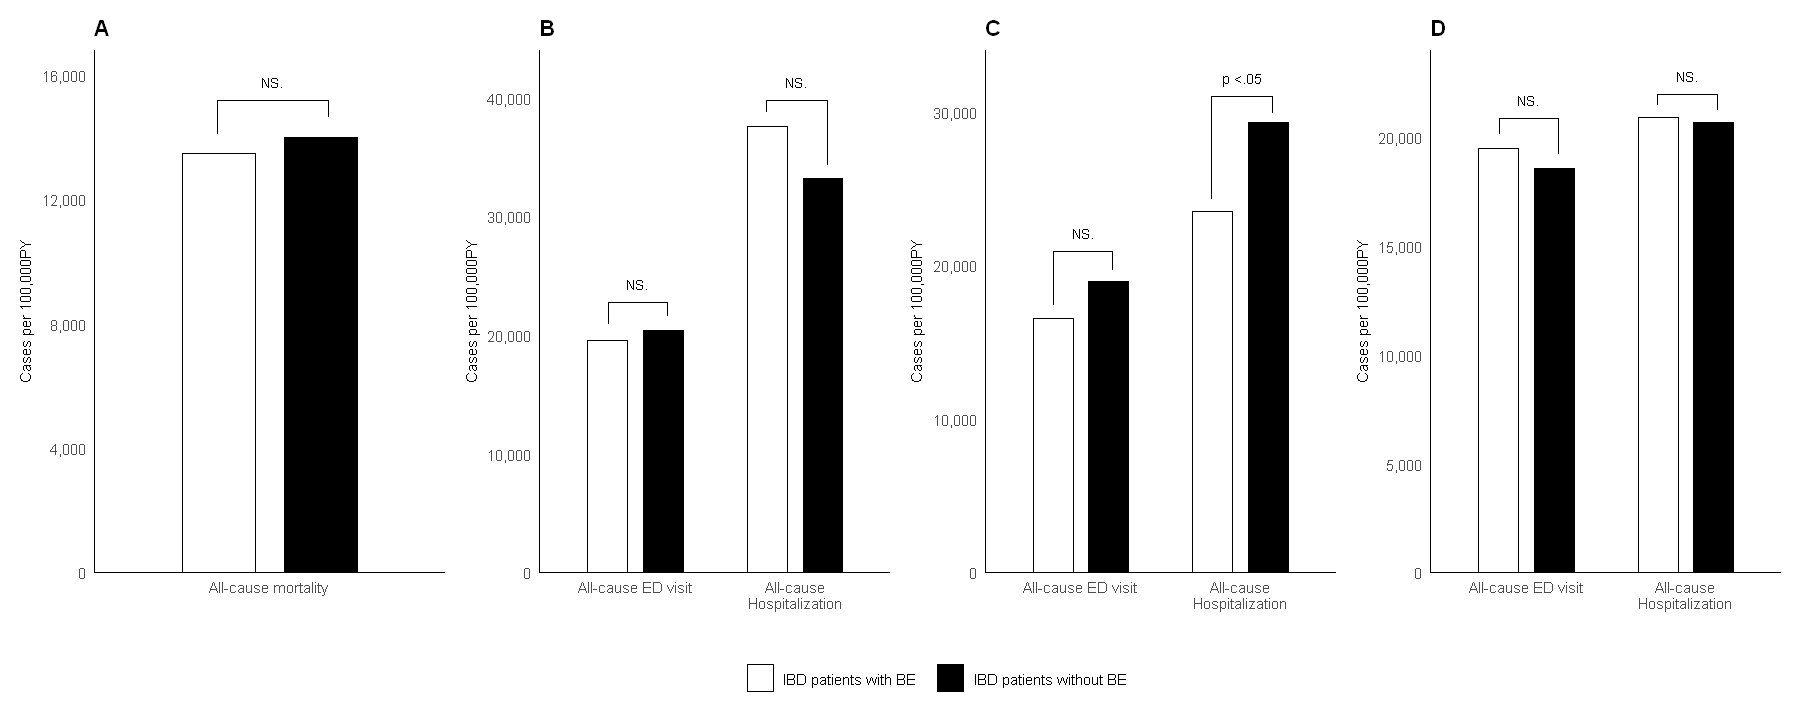

In [22]:
library(patchwork)
library(repr)
options(repr.plot.width=15, repr.plot.height=6)
# Combine plots and share legend
combined_plot <- p_dth + p_all + p_res + p_ibd + plot_layout(guides = "collect", ncol=4) & theme(legend.position = 'bottom')
# Display the combined plot
print(combined_plot)